In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
from math import pi

In [8]:
def lorentz(x, y0, amp, cen, wid):
    return y0 + (amp)*(wid/((x-cen)**2 + wid**2))

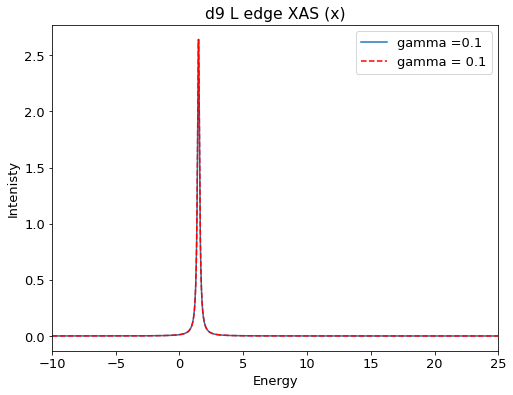

In [165]:
nedos = 10000
shift = 0
xdata = np.linspace(-25,25,nedos)
ydata1 = np.zeros(nedos)
ydata2 = np.zeros(nedos)
inp1 = "./DATA_DIR/nh=4/tenDQ=1.9/del_eff=4.0/t=0.6/XAS_Ledge_X.txt"
inp2 = "./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=0.6/XAS_Ledge_X.txt"
inp1 = "./XAS_Kedge_X.txt"
inp2 = "./XAS_Kedge_Y.txt"
with open(inp1) as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        ydata1 += lorentz(xdata,0,i,p,0.1)
        
with open(inp1) as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        ydata2 += lorentz(xdata,0,i,p,0.1)

plt.figure(figsize=(8,6))
plt.rc('font', size=13)   
plt.plot(xdata+shift,ydata1)
plt.plot(xdata,ydata2,'red',linestyle='--')
plt.legend(['gamma =0.1','gamma = 0.1'])
plt.title("d9 L edge XAS (x)")
plt.ylabel("Intenisty")
plt.xlabel("Energy")
plt.xlim([-10+shift, 25+shift])

plt.show()

./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=0.4/XAS_Ledge_X.txt
./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=0.6/XAS_Ledge_X.txt
./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=0.8/XAS_Ledge_X.txt


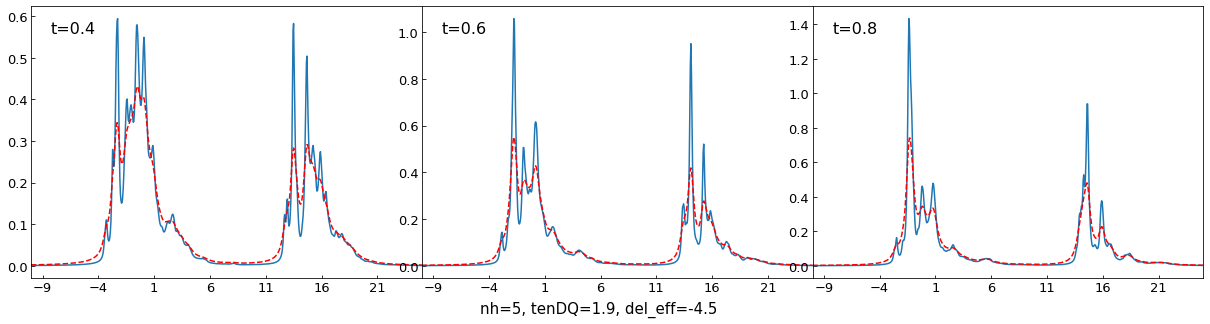

In [129]:
# Plotting d5/d6 LiCoO2
nedos = 1000
nh = 5
tenDQ = 1.9
del_eff = -4.5
edge = 'L'
x = np.linspace(-25,25,nedos)
data_dir = os.path.join("./DATA_DIR","nh="+str(nh),"tenDQ="+f"{tenDQ:.1f}",
                        "del_eff="+f'{del_eff:.1f}')

t_num = len(os.listdir(data_dir))
fig = plt.figure(figsize=(21,5))
gs = fig.add_gridspec(1,t_num,hspace=0,wspace=0)
axs = gs.subplots(sharex=False,sharey=False)
for t,t_dir in enumerate(sorted(os.listdir(data_dir))):
    data_file = os.path.join(data_dir,t_dir,'XAS_'+str(edge)+'edge_X.txt')
    print(data_file)
    xas_01 = np.zeros(nedos)
    xas_03 = np.zeros(nedos)
    with open(data_file) as xas:
        lines = xas.readlines()[1:]
        for l in lines:
            p = float(l.split()[0])
            i = float(l.split()[1])
            xas_01 += lorentz(x,0,i,p,0.1)
            xas_03 += lorentz(x,0,i,p,0.3)
    axs[t].plot(x,xas_01)
    axs[t].plot(x,xas_03,color="red",linestyle="dashed")
    if (edge == 'L'):
        axs[t].set_xlim([-10,25])
        axs[t].set_xticks(range(-9, 26, 5))
    if (edge == 'K'):
        axs[t].set_xlim([-20,0])
        axs[t].set_xticks(range(-18, 0, 5))
    axs[t].annotate(t_dir, xy=(0.05, 0.9), xycoords="axes fraction",fontsize=16)
fig.text(0.5,0.04, "nh="+str(nh)+", tenDQ="+f"{tenDQ:.1f}"+", del_eff="+f'{del_eff:.1f}',ha="center",va="center",fontsize=15)
plt.rc('font', size=13)
for t in range(0,t_num):
    axs[t].tick_params(axis="x",direction="in")
    axs[t].tick_params(axis="y",direction="in")

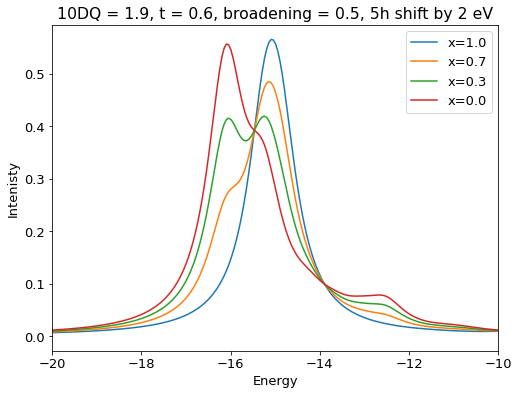

In [199]:
nedos = 1000
x = np.linspace(-25,25,nedos)
tenDQ = 1.9
t = 0.6
b = 0.5
edge = 'K'
pct_4h = os.path.join("./DATA_DIR","nh="+str(4),"tenDQ="+f"{tenDQ:.1f}",
                        "del_eff="+f'{1:.1f}',"t="+f'{t:.1f}','XAS_'+str(edge)+'edge_X.txt')
nct_5h = os.path.join("./DATA_DIR","nh="+str(5),"tenDQ="+f"{tenDQ:.1f}",
                        "del_eff="+f'{-2:.1f}',"t="+f'{t:.1f}','XAS_'+str(edge)+'edge_X.txt')
plt.figure(figsize=(8,6))
plt.rc('font', size=13)  

# READ FILES
xas_4h = np.zeros(nedos)
xas_5h = np.zeros(nedos)
with open(pct_4h) as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        xas_4h += lorentz(x,0,i,p,b)

with open(nct_5h) as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        xas_5h += lorentz(x-2,0,i,p,b)

for i in np.arange(0,1,0.33):
    xas_peak = (1-i)*3.5*xas_4h + i*xas_5h
    plt.plot(x,xas_peak,label="x="+f'{(1-i):.1f}')
plt.title("10DQ = 1.9, t = 0.6, broadening = 0.5, 5h shift by 2 eV")
plt.ylabel("Intenisty")
plt.xlabel("Energy")
plt.xlim([-20,-10])
plt.legend()

plt.show()